Importing packages:

In [9]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

We can see that overlap with the lithoprobe lines

In [10]:
lithoprobe = gpd.read_file("../data/lithoprobe.geojson")

gravi_df = pd.read_csv("../data/Canada_Gravity_2018.csv", sep=",")
gdf = gpd.GeoDataFrame(
    gravi_df, geometry=gpd.points_from_xy(gravi_df.X, gravi_df.Y), crs=4326)

gdf_utm = gdf.to_crs(crs=32610) #  to have distance in meters
lithoprobe_utm = lithoprobe.to_crs(32610)

Convert gravi points to geodataframe and get the points intersecting with lithoprobe

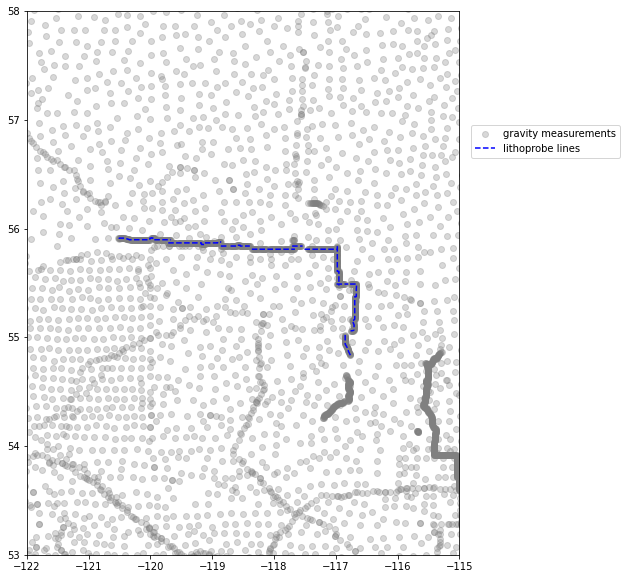

In [11]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xlim(-122, -115) 
ax.set_ylim(53, 58) 

gdf.plot(ax = ax, color='grey', alpha=0.3, label='gravity measurements')
lithoprobe.plot(ax = ax, linestyle='dashed', color='blue', label='lithoprobe lines')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8))
plt.show()

Some gravity measurements are no directly on the lithoprobe profile, so we create 10m buffer

In [12]:
buffer = 10
lithoprobe_utm['geometry'] = lithoprobe_utm.geometry.buffer(buffer)

To get the points within th lithoprobe line, we use "overlay: method

In [13]:
points_subset = gpd.overlay(gdf_utm, lithoprobe_utm)
print("Gravity measurements along the lithoprobe:", points_subset.shape[0])

Gravity measurements along the lithoprobe: 646


We can visualize the gravity along the profile

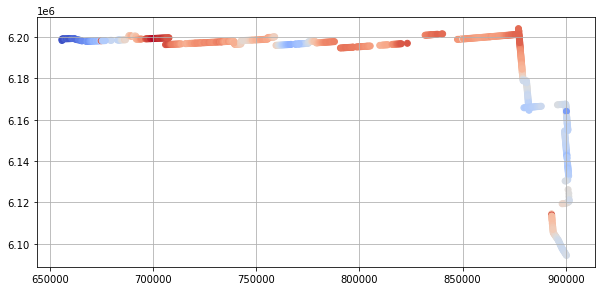

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))
points_subset.plot(ax=ax, column='BOUGUER', cmap='coolwarm')
plt.grid(True)
plt.show()

Example of tif files visualization in rasterio

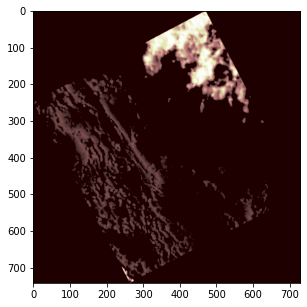

In [15]:
src = rasterio.open('../data/Canada_GRAV_2km_Bouguer_GeoTIFF_clip_26910.tif') 

fig, ax = plt.subplots(figsize = (10, 5))
gravi = src.read()
plt.imshow(src.read(1), cmap='pink');